Columns: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no

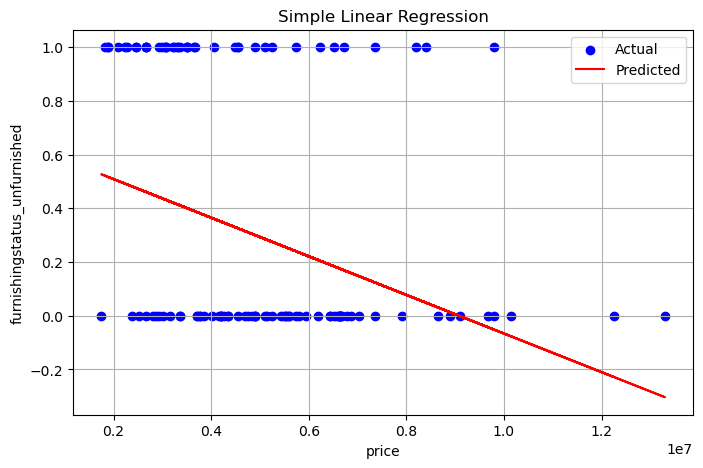


--- Multiple Linear Regression ---
Features Used: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished']
Coefficients: [-5.30489306e-08  8.13982152e-06  5.31551160e-03  3.13372714e-02
 -2.69838482e-02 -3.77413276e-02 -8.72422218e-02 -1.10394258e-02
 -7.44795326e-02 -1.82589783e-02 -1.43149922e-02  1.74833654e-02
 -5.41709090e-01]
Intercept: 0.8787827692454679
MSE: 0.15257050785564727
R² Score: 0.3498241736610668


In [1]:
# linear_regression_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("singh-housing.csv")


print("Columns:", df.columns)
print(df.head())


df_encoded = pd.get_dummies(df, drop_first=True)


feature_cols = df_encoded.columns[:-1]  
target_col = df_encoded.columns[-1]     


X_simple = df_encoded[[feature_cols[0]]]  
y = df_encoded[target_col]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)

print("\n--- Simple Linear Regression ---")
print("Feature Used:", feature_cols[0])
print("Coefficient:", model_simple.coef_)
print("Intercept:", model_simple.intercept_)
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))


plt.figure(figsize=(8, 5))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted')
plt.title("Simple Linear Regression")
plt.xlabel(feature_cols[0])
plt.ylabel(target_col)
plt.legend()
plt.grid(True)
plt.show()


X_multi = df_encoded[feature_cols]
y_multi = df_encoded[target_col]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)

print("\n--- Multiple Linear Regression ---")
print("Features Used:", list(feature_cols))
print("Coefficients:", model_multi.coef_)
print("Intercept:", model_multi.intercept_)
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))
